# Example of Sequential H-K Stacking of Receiver Functions

This notebook demonstrates the Sequential H-K Stacking analysis of receiver functions and the visualisation of the results based on [rfsed](https://github.com/akinremisa/rfsed) package

In the first step, the sediment layer thickness and Vp/Vs are stacked for using high frequency receiver function. In the second step, the sediment thickness and velocity are then used to correct for the time delay in the Moho phases due to the presence of the sediment.

In this example, the data used is from Station OPLO (Network: NL) in the Netherlands. It is located on thick sedimentary layers. The sediment effects observed include an apparent shift in the first peak due to arrivals from the sediment-basement interface. Also, some amplitude interference is observed in the Moho conversion signal due to the arrivals of the sediment reverberation phases. Hence, the effects of the sediment on the receiver function leads to poor estimation of the crustal thickness and Vp/Vs while using the Sequential H-K Stacking method. This may be due to the similar arrival times of the sediment reverberations and the Moho pahse, leading to interference of the amplitudes in the receiver function.

The required functions are first imported

In [1]:
import os 
import numpy as np
from rf.rfstream import read_rf
from rfsed.hkSeqYeck import hkSeq, plotSeqhk
from rfsed.util import rfMoho_example, rfSed_example, save_plot

The station and the directory to save the output are defined. 

In [2]:
staname='OPLO'
savedir=save_plot()
savepath = savedir + '/HK_Sequential_Yeck/'
if not os.path.exists(savepath):  # create data folder if necessary
    os.mkdir(savepath)

The sediment layer H-K Stacking parameters and the high frequency reciever functions data are defined

In [3]:
#----------------------------------------------------------
# Sediment Parameters
w1Sed, w2Sed, w3Sed = [0.3, 0.4, 0.3]
KSed= np.linspace(1.65,2.25,201)
HSed=np.linspace(0,10,201)
rfstSed = rfSed_example()
rfstreamSed = rfstSed.select(component='R', station=staname)
preonset=10
VpSed=3.3

The Moho layer H-K Stacking Parameters and the low frequency reciever functions data are defined 

In [4]:
#----------------------------------------------------------
# Moho Parameters
w1Moho, w2Moho, w3Moho = [0.4, 0.3, 0.3]
KMoho= np.linspace(1.65,1.95,121)
HMoho=np.linspace(20,60,201)
rfstMoho = rfMoho_example()
rfstreamMoho = rfstMoho.select(component='R', station=staname)
preonset=10
VpMoho=6.9
#----------------------------------------------------------

The first and second steps of the Sequential H-K stacking are done in the SequentialHKResult function: 

The result are then visualised and saved to the save directory

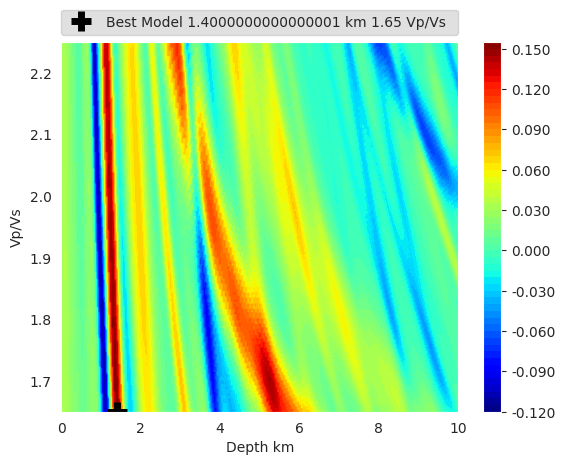

Best Sediment depth:  1.4000000000000001 Best Sediment Vp/Vs: 1.65 Max stack:  0.15236639700490098


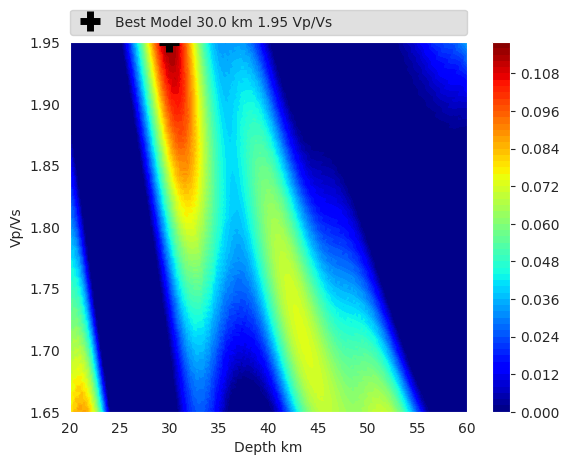

Best Moho depth:  30.0 Best Moho Vp/Vs: 1.95 Max stack:  0.15236639700490098


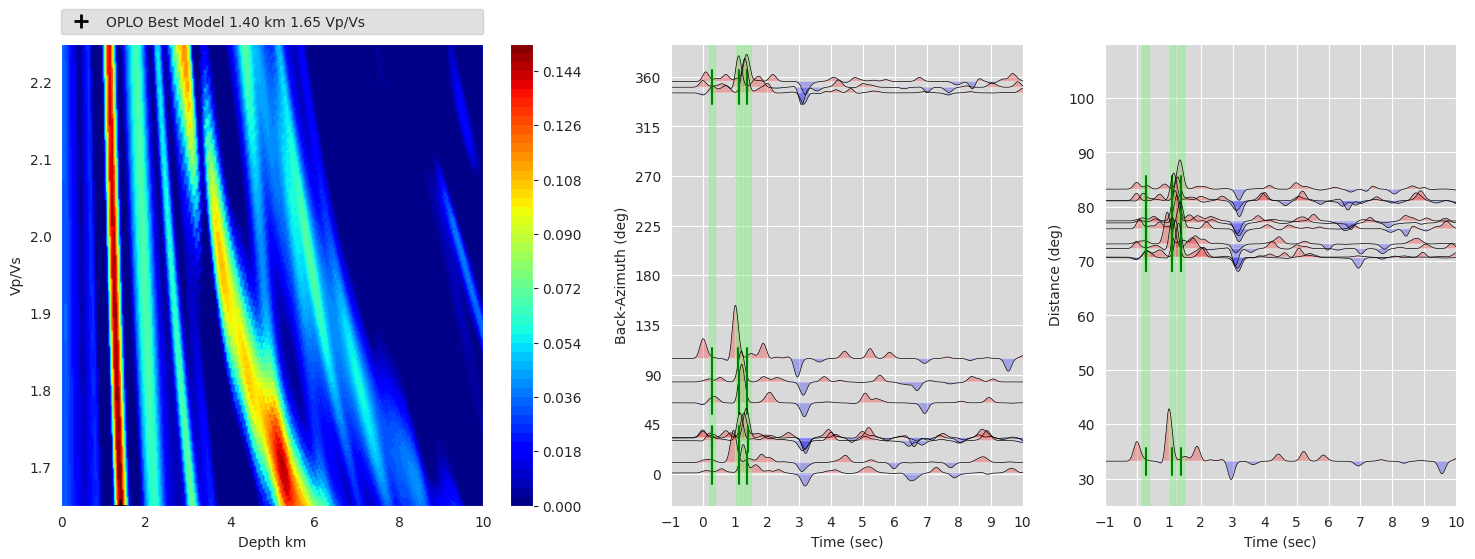

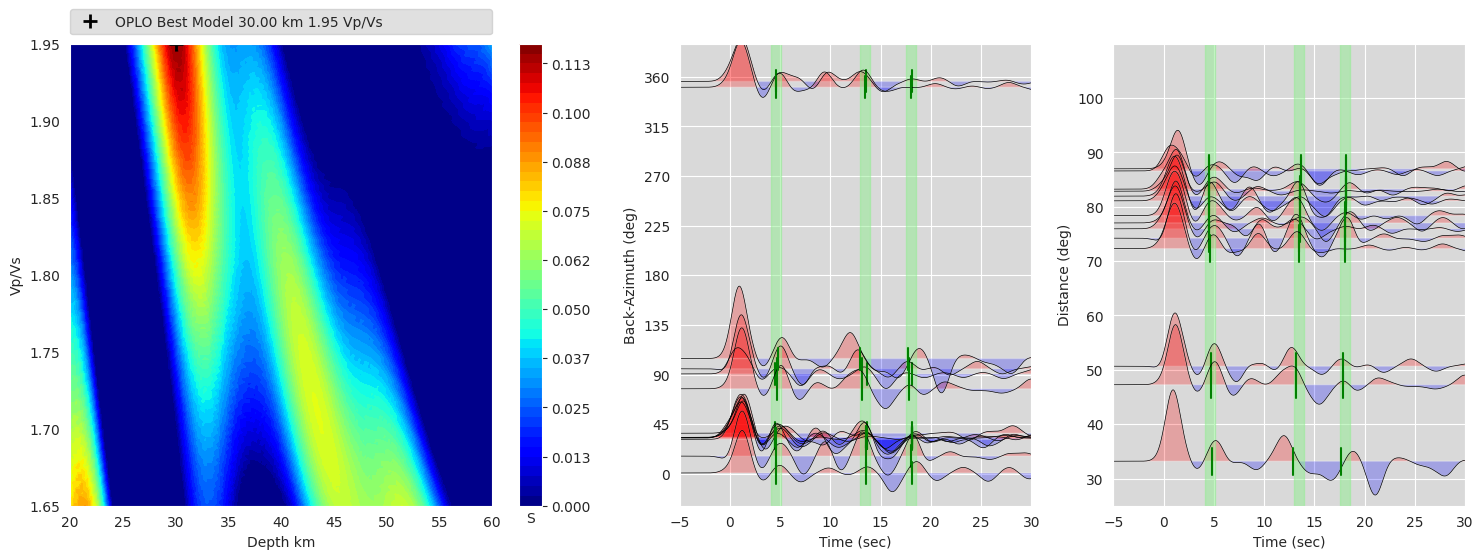

In [5]:
SequentialHKResult = hkSeq(rfstreamSed, rfstreamMoho, preonset, w1Sed = w1Sed, w2Sed = w2Sed, w3Sed=w3Sed, KSed=KSed, 
                           HSed=HSed, VpSed=VpSed, w1Moho = w1Moho, w2Moho = w2Moho, w3Moho=w3Moho, KMoho=KMoho, 
                            HMoho=HMoho, VpMoho=VpMoho, stack = False)
plotSeqhk(SequentialHKResult=SequentialHKResult, g = [75.,10., 15., 2.5], rmneg = None, savepath=savepath, format = 'jpg')